**HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms.**

# Manifold learning with CIFAR-10 dataset

**CIFAR-10 Dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images. The data set is divided into 10 classes, with 6000 images per class. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The data set is available in the torchvision.datasets.There are 50000 training images and 10000 test images.



# **Manifold Learning**

If we are trying to visualize high-dimensional datasets, it can be highly challenging. Plotting two or three-dimensional data can show the data's underlying structure, but high-dimensional plots are difficult to understand. So we need to reduce its dimension. Manifold learning is a techniques for reducing dimension to analyze high-dimensional data. Extending linear frameworks, such as PCA, to recognise non-linear structure in data is what manifold learning aims to achieve.

In this project, we are going to compare different manifold learning algorithms on CIFAR-10 dataset. The algorithms are:

* Principle Component Analysis

* Isomap Embedding

* Locally Linear Embedding

* Multidimensional scaling

* SpectralEmbedding

* T-distributed Stochastic Neighbor Embedding




In [6]:
import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE



In [7]:
# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.numpy().flatten())])
dataset = CIFAR10(root='data/', download=True, transform=transform)
test_dataset = CIFAR10(root='data/', train=False, transform=transform)

Files already downloaded and verified


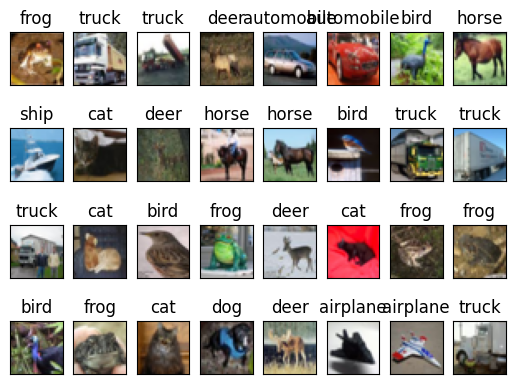

In [6]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(dataset.data[i])
    axi.set_title(dataset.classes[dataset.targets[i]])

In [8]:
# Extract data and labels
X_train = np.array([x[0] for x in dataset])
y_train = np.array([x[1] for x in dataset])

In [7]:
X_train.shape

(50000, 3072)

## Principle Component Analysis (PCA)

PCA, or principal component analysis, is a basic method for reducing dimensionality. It is a linear method used to transform a high-dimensional dataset into a lower-dimensional space without loosing much information in the original data.

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)


In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


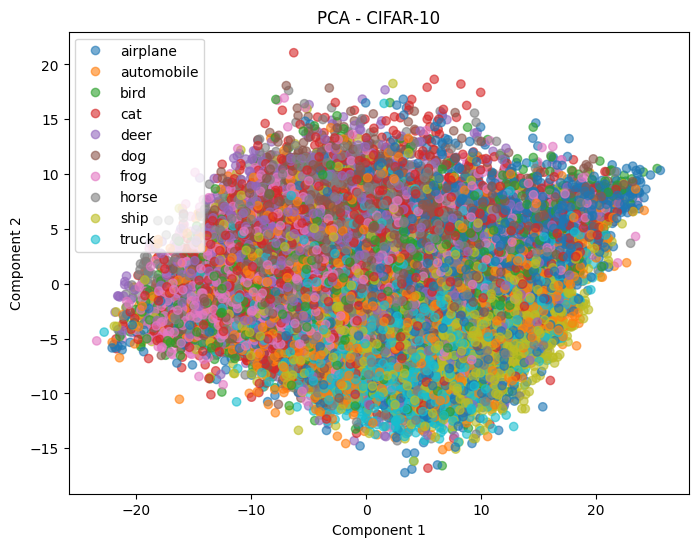

In [10]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('PCA - CIFAR-10')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


Since it is a large dataset, I am facing some memory related problems in my computer. So I need to sample the dataset.

In [9]:
sample_size = int(0.1 * len(X_train))

np.random.seed(0)
indices = np.random.choice(len(X_train), sample_size, replace=False)

X_sampled = X_train[indices]
y_sampled = y_train[indices]

In [17]:
X_sampled.shape

(5000, 3072)

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sampled)

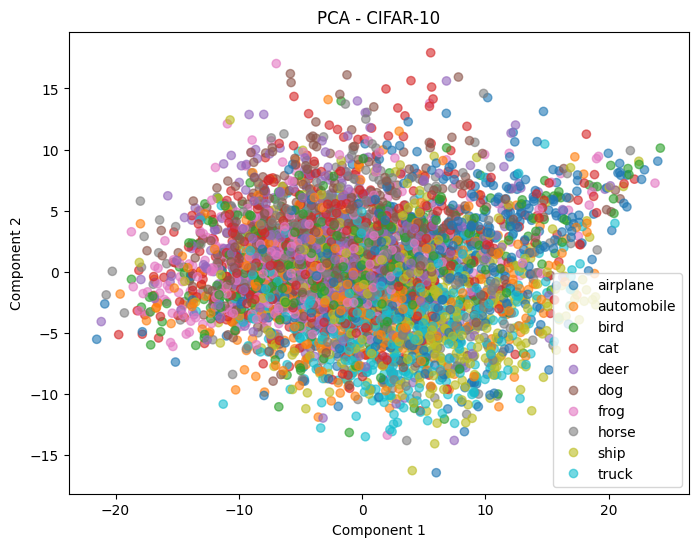

In [13]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sampled, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('PCA - CIFAR-10')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## **Isomap Embedding**

Isomap embedding is another manifold algorithm used for dimensionality reduction. Isomap is different from PCA.It can reveal the underlying structure of non-linear data that is located on a lower-dimensional manifold, while PCA concentrates on linear correlations.

In [14]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_sampled)

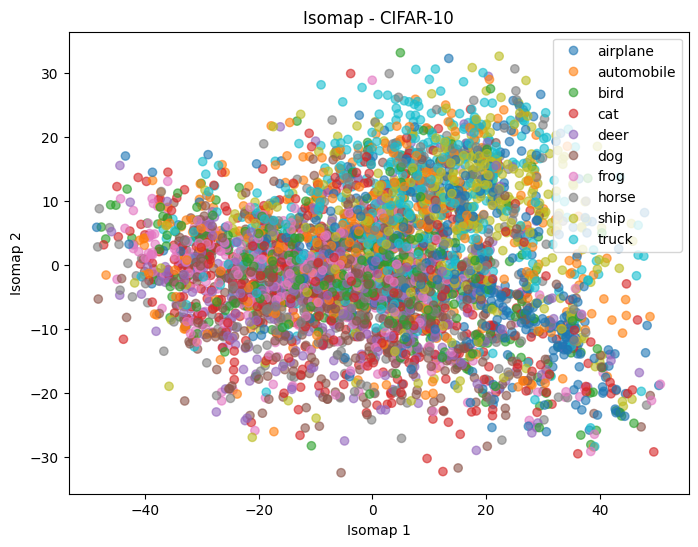

In [36]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_sampled, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Isomap - CIFAR-10')
plt.xlabel('Isomap 1')
plt.ylabel('Isomap 2')
plt.show()

## **Locally Linear Embedding**

In the field of manifold learning, another dimensionality reduction method is called locally linear embedding (LLE). It reveals the underlying structure of non-linear data in a manner similar to that of Isomap, but from a different angle.

In [16]:
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_sampled)

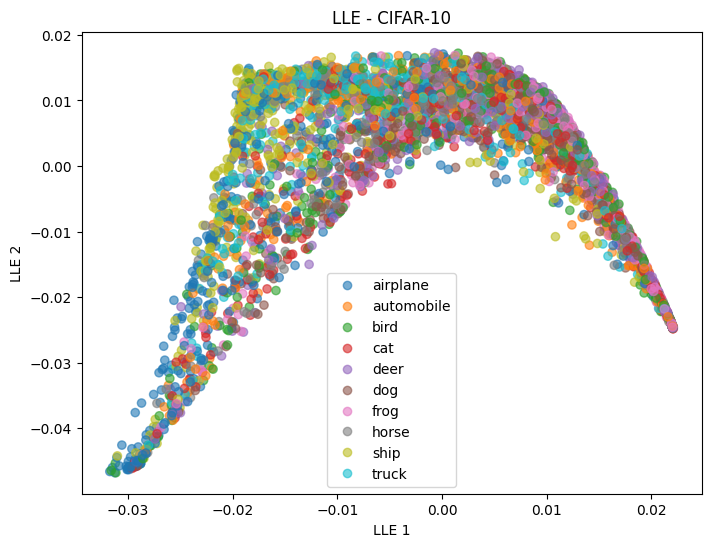

In [19]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_sampled, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('LLE - CIFAR-10')
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.show()

## **Multidimensional scaling**
Multidimensional scaling (MDS) is used to show the relationships between high-dimensional data points in a lower-dimensional domain, usually two or three dimensions. Unlike PCA, It focuses on capturing the most variance in the data, MDS emphasizes preserving the dissimilarities between data points.

In [31]:
mds = MDS(n_components=2, normalized_stress='auto')
X_mds = mds.fit_transform(X_sampled)

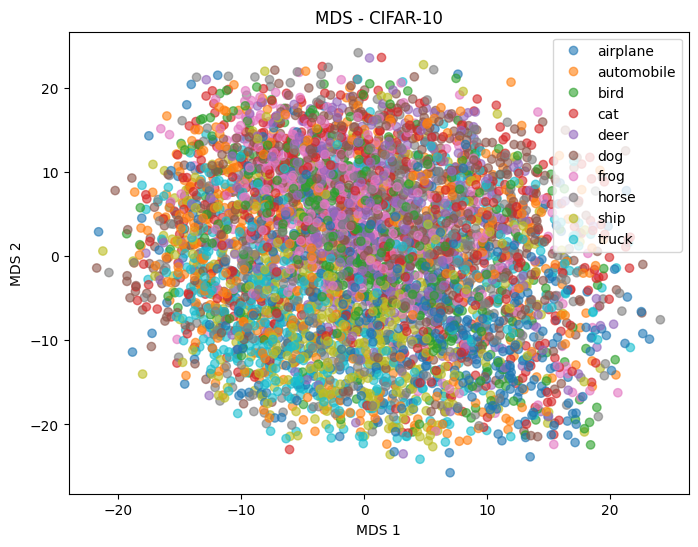

In [33]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_sampled, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('MDS - CIFAR-10')
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.show()

## **Spectral Embedding**
Spectral embedding is a dimensionality reduction technique used in manifold learning that uses the properties of a graph to reveal the underlying structure of high-dimensional data. Even when the data is distributed on a non-linear manifold, it is excellent in determining a low-dimensional representation that maintains the similarities between neighboring data points.

In [21]:
spectral = SpectralEmbedding(n_components=2)
X_spectral = spectral.fit_transform(X_sampled)

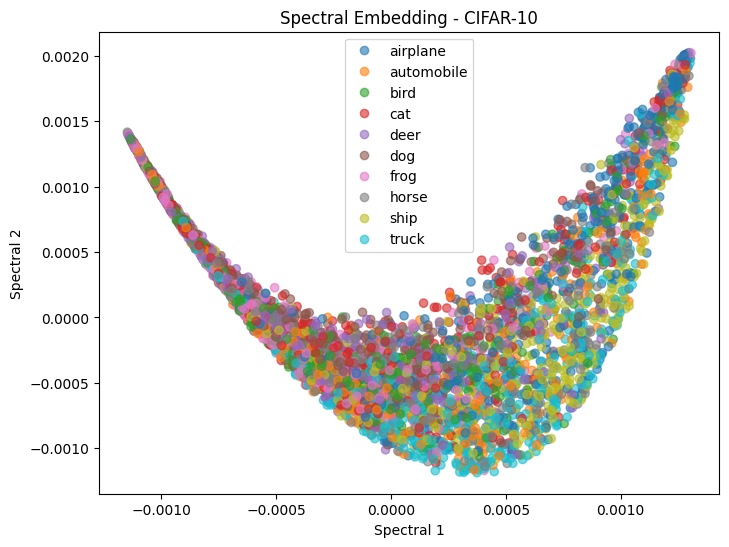

In [22]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_spectral[:, 0], X_spectral[:, 1], c=y_sampled, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Spectral Embedding - CIFAR-10')
plt.xlabel('Spectral 1')
plt.ylabel('Spectral 2')
plt.show()

## **T-distributed Stochastic Neighbor Embedding**
T-distributed Stochastic Neighbor Embedding (t-SNE) is a popular method for dimensionality reduction and high-dimensional data visualization. It is really helpful for visualizing data with clusters since it is excellent at maintaining the similarities between nearby data points while highlighting the differences between distant locations.

In [23]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_sampled)

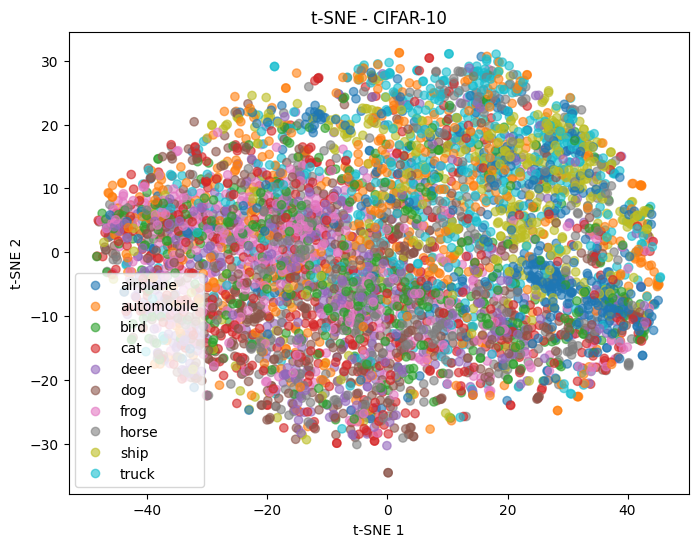

In [24]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sampled, cmap='tab10', alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('t-SNE - CIFAR-10')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

## **Uniform Manifold Approximation and Projection (UMAP)**
A more modern development in manifold learning methods for dimensionality reduction is Uniform Manifold Approximation and Projection (UMAP). Because of its capacity to manage high-dimensional data while maintaining both local and global structures, it has become more popular.

In [1]:
!pip install umap

In [2]:
!pip install umap-learn

In [3]:
import umap

In [4]:
reducer = umap.UMAP()

In [11]:
reducer = umap.UMAP(random_state=42)
reducer.fit(X_sampled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [12]:
embedding = reducer.transform(X_sampled)
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(5000, 2)

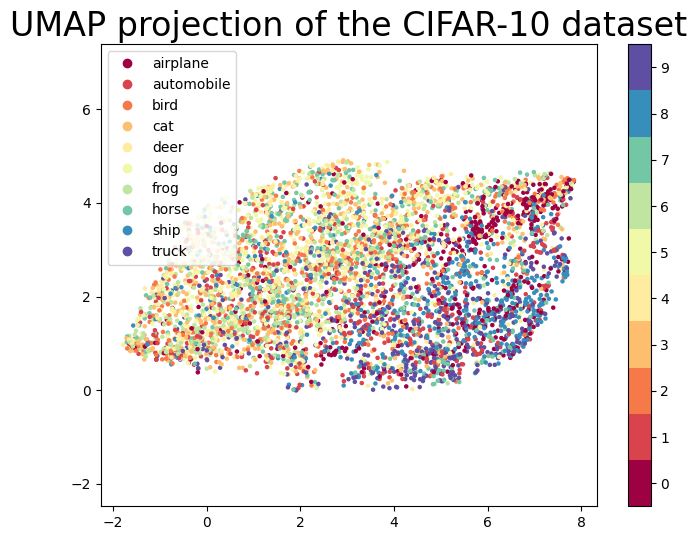

In [16]:
plt.figure(figsize=(8, 6))
scatter=plt.scatter(embedding[:, 0], embedding[:, 1], c=y_sampled, cmap='Spectral', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the CIFAR-10 dataset', fontsize=24);


# **Conclusion**

We have compared different manifold learning algorithms with the CIFAR-10 dataset. We have discovered that various algorithms are capable of producing high-quality visualizations that accurately represent the local and global structures of the data.

When comparing each methods, I feel each of them are equally likely grouped each class. I am confused to sugest a best manifold learning algorithm. Some classed are classified more accurately compared to others. For example, the class 'Truck' is seemed to be grouped well comparitively in every manifold learning algorthms. But the class 'cat' is seemed to be more scattered compaired to other classes.